<a href="https://colab.research.google.com/github/apalliyil/team-data-science/blob/main/Milestone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving season-1819_csv.csv to season-1819_csv.csv


In [5]:
import io
soccer_df = pd.read_csv(io.BytesIO(uploaded["season-1819_csv.csv"]))

Fixing the Format of the date column

In [6]:
soccer_df["Date"] = pd.to_datetime(soccer_df["Date"], format = "%d/%m/%Y")
soccer_df["Date"]

0     2018-08-10
1     2018-08-11
2     2018-08-11
3     2018-08-11
4     2018-08-11
         ...    
375   2019-05-12
376   2019-05-12
377   2019-05-12
378   2019-05-12
379   2019-05-12
Name: Date, Length: 380, dtype: datetime64[ns]

Added Column to indicate high-scoring games

In [7]:
soccer_df["Total Goals"] = soccer_df["FTHG"] + soccer_df["FTAG"]
soccer_df["HighScoring"] = np.where(soccer_df["Total Goals"] >= 5, 1, 0)
soccer_df.drop(columns = ["Total Goals"], axis = 1, inplace = True)
soccer_df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,HighScoring
0,E0,2018-08-10,Man United,Leicester,2,1,H,1,0,H,...,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69,0
1,E0,2018-08-11,Bournemouth,Cardiff,2,0,H,1,0,H,...,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70,0
2,E0,2018-08-11,Fulham,Crystal Palace,0,2,A,0,1,A,...,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90,0
3,E0,2018-08-11,Huddersfield,Chelsea,0,3,A,0,2,A,...,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58,0
4,E0,2018-08-11,Newcastle,Tottenham,1,2,A,1,2,A,...,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,2019-05-12,Liverpool,Wolves,2,0,H,1,0,H,...,22,-1.50,1.98,1.91,2.01,1.95,1.32,5.89,9.48,0
376,E0,2019-05-12,Man United,Cardiff,0,2,A,0,1,A,...,21,-2.00,2.52,2.32,1.72,1.64,1.30,6.06,9.71,0
377,E0,2019-05-12,Southampton,Huddersfield,1,1,D,1,0,H,...,22,-1.50,2.27,2.16,1.80,1.73,1.37,5.36,8.49,0
378,E0,2019-05-12,Tottenham,Everton,2,2,D,1,0,H,...,19,-0.50,2.13,2.08,1.85,1.80,1.91,3.81,4.15,0


Converting H, A, and D to integers in FTR and HTR columns

In [8]:
outcome_nums = {"FTR": {"H":2, "A":1, "D":0}}
soccer_df.replace(outcome_nums, inplace = True)
halftime_nums = {"HTR": {"H":2, "A":1, "D":0}}
soccer_df.replace(halftime_nums, inplace = True)
soccer_df.head(50)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,HighScoring
0,E0,2018-08-10,Man United,Leicester,2,1,2,1,0,2,...,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69,0
1,E0,2018-08-11,Bournemouth,Cardiff,2,0,2,1,0,2,...,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70,0
2,E0,2018-08-11,Fulham,Crystal Palace,0,2,1,0,1,1,...,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90,0
3,E0,2018-08-11,Huddersfield,Chelsea,0,3,1,0,2,1,...,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58,0
4,E0,2018-08-11,Newcastle,Tottenham,1,2,1,1,2,1,...,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89,0
5,E0,2018-08-11,Watford,Brighton,2,0,2,1,0,2,...,22,-0.25,2.07,2.01,1.90,1.86,2.58,3.08,3.22,0
6,E0,2018-08-11,Wolves,Everton,2,2,0,1,1,0,...,22,-0.25,2.04,1.98,1.92,1.88,2.44,3.23,3.32,0
7,E0,2018-08-12,Arsenal,Man City,0,2,1,0,1,1,...,20,0.75,1.78,1.74,2.21,2.15,4.43,4.13,1.81,0
8,E0,2018-08-12,Liverpool,West Ham,4,0,2,2,0,2,...,21,-1.75,1.95,1.90,2.06,1.97,1.25,6.95,12.00,0
9,E0,2018-08-12,Southampton,Burnley,0,0,0,0,0,0,...,20,-0.75,2.19,2.11,1.82,1.76,2.03,3.19,4.65,0


Feature Rankings for Home and Away team statistical columns

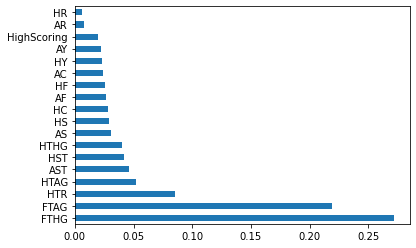

In [9]:
mini_df = soccer_df[["FTR","FTHG","FTAG","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR","HighScoring"]]
X = mini_df.iloc[:,1:19]
Y = mini_df.iloc[:,0]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
model.feature_importances_
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()

In [10]:
soccer_df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,HighScoring
0,E0,2018-08-10,Man United,Leicester,2,1,2,1,0,2,...,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69,0
1,E0,2018-08-11,Bournemouth,Cardiff,2,0,2,1,0,2,...,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70,0
2,E0,2018-08-11,Fulham,Crystal Palace,0,2,1,0,1,1,...,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90,0
3,E0,2018-08-11,Huddersfield,Chelsea,0,3,1,0,2,1,...,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58,0
4,E0,2018-08-11,Newcastle,Tottenham,1,2,1,1,2,1,...,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,2019-05-12,Liverpool,Wolves,2,0,2,1,0,2,...,22,-1.50,1.98,1.91,2.01,1.95,1.32,5.89,9.48,0
376,E0,2019-05-12,Man United,Cardiff,0,2,1,0,1,1,...,21,-2.00,2.52,2.32,1.72,1.64,1.30,6.06,9.71,0
377,E0,2019-05-12,Southampton,Huddersfield,1,1,0,1,0,2,...,22,-1.50,2.27,2.16,1.80,1.73,1.37,5.36,8.49,0
378,E0,2019-05-12,Tottenham,Everton,2,2,0,1,0,2,...,19,-0.50,2.13,2.08,1.85,1.80,1.91,3.81,4.15,0


Remove the first column that states the division. This column is unnecessary and has the same value for all teams because they are all in the Premier League. 


In [11]:
soccer_df.drop(columns = ["Div"], axis = 1, inplace = True)

In [12]:
soccer_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,HighScoring
0,2018-08-10,Man United,Leicester,2,1,2,1,0,2,A Marriner,...,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69,0
1,2018-08-11,Bournemouth,Cardiff,2,0,2,1,0,2,K Friend,...,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70,0
2,2018-08-11,Fulham,Crystal Palace,0,2,1,0,1,1,M Dean,...,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90,0
3,2018-08-11,Huddersfield,Chelsea,0,3,1,0,2,1,C Kavanagh,...,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58,0
4,2018-08-11,Newcastle,Tottenham,1,2,1,1,2,1,M Atkinson,...,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2019-05-12,Liverpool,Wolves,2,0,2,1,0,2,M Atkinson,...,22,-1.50,1.98,1.91,2.01,1.95,1.32,5.89,9.48,0
376,2019-05-12,Man United,Cardiff,0,2,1,0,1,1,J Moss,...,21,-2.00,2.52,2.32,1.72,1.64,1.30,6.06,9.71,0
377,2019-05-12,Southampton,Huddersfield,1,1,0,1,0,2,L Probert,...,22,-1.50,2.27,2.16,1.80,1.73,1.37,5.36,8.49,0
378,2019-05-12,Tottenham,Everton,2,2,0,1,0,2,A Marriner,...,19,-0.50,2.13,2.08,1.85,1.80,1.91,3.81,4.15,0


Now that the division column is removed, we can look to drop other columns as well. While some of the betting odds can be a bit hard to understand, there are two main types that are provided here. There are odds for winning and losing, and there are odds for certain spreads, or outcomes in a match. The latter's payout is based on how accurate a bettor is in predicting, for example, the exact number of goals scored in a match, compared to the former, which just predicts whether a team will win or lose. Spread betting is not really relevant to our goal for our project, so we will remove any columns that deal with spread betting. This means we will remove any columns involving Asian Handicap spreads, a type of spread betting originating in Asia. Starting at index 0, we will remove columns 41 to 58. 

In [13]:
soccer_df.drop(soccer_df.iloc[:, 41:59], inplace=True, axis=1)
print(soccer_df)

          Date      HomeTeam        AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  \
0   2018-08-10    Man United       Leicester     2     1    2     1     0   
1   2018-08-11   Bournemouth         Cardiff     2     0    2     1     0   
2   2018-08-11        Fulham  Crystal Palace     0     2    1     0     1   
3   2018-08-11  Huddersfield         Chelsea     0     3    1     0     2   
4   2018-08-11     Newcastle       Tottenham     1     2    1     1     2   
..         ...           ...             ...   ...   ...  ...   ...   ...   
375 2019-05-12     Liverpool          Wolves     2     0    2     1     0   
376 2019-05-12    Man United         Cardiff     0     2    1     0     1   
377 2019-05-12   Southampton    Huddersfield     1     1    0     1     0   
378 2019-05-12     Tottenham         Everton     2     2    0     1     0   
379 2019-05-12       Watford        West Ham     1     4    1     0     2   

     HTR     Referee  ...   WHH   WHD    WHA   VCH   VCD    VCA  Bb1X2  PSC

In [14]:
soccer_df.drop(["Bb1X2"], inplace = True, axis = 1)
print(soccer_df)

          Date      HomeTeam        AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  \
0   2018-08-10    Man United       Leicester     2     1    2     1     0   
1   2018-08-11   Bournemouth         Cardiff     2     0    2     1     0   
2   2018-08-11        Fulham  Crystal Palace     0     2    1     0     1   
3   2018-08-11  Huddersfield         Chelsea     0     3    1     0     2   
4   2018-08-11     Newcastle       Tottenham     1     2    1     1     2   
..         ...           ...             ...   ...   ...  ...   ...   ...   
375 2019-05-12     Liverpool          Wolves     2     0    2     1     0   
376 2019-05-12    Man United         Cardiff     0     2    1     0     1   
377 2019-05-12   Southampton    Huddersfield     1     1    0     1     0   
378 2019-05-12     Tottenham         Everton     2     2    0     1     0   
379 2019-05-12       Watford        West Ham     1     4    1     0     2   

     HTR     Referee  ...    PSA   WHH   WHD    WHA   VCH   VCD    VCA  PSC

The next thing we want to do is make some sense of the overall odds. We can do this by averaging all the home, away, and draw odds of the various betting services provided. Let's create a new column for the average home odds (AvgH), average away odds (AvgA), and average draw odds (AvgD). 

In [15]:
soccer_df['AvgH'] = soccer_df[['B365H','BWH','IWH','PSH','WHH','VCH']].mean(axis=1)
print(soccer_df)

          Date      HomeTeam        AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  \
0   2018-08-10    Man United       Leicester     2     1    2     1     0   
1   2018-08-11   Bournemouth         Cardiff     2     0    2     1     0   
2   2018-08-11        Fulham  Crystal Palace     0     2    1     0     1   
3   2018-08-11  Huddersfield         Chelsea     0     3    1     0     2   
4   2018-08-11     Newcastle       Tottenham     1     2    1     1     2   
..         ...           ...             ...   ...   ...  ...   ...   ...   
375 2019-05-12     Liverpool          Wolves     2     0    2     1     0   
376 2019-05-12    Man United         Cardiff     0     2    1     0     1   
377 2019-05-12   Southampton    Huddersfield     1     1    0     1     0   
378 2019-05-12     Tottenham         Everton     2     2    0     1     0   
379 2019-05-12       Watford        West Ham     1     4    1     0     2   

     HTR     Referee  ...   WHH   WHD    WHA   VCH   VCD    VCA  PSCD  PSCA

In [16]:
soccer_df['AvgD'] = soccer_df[['B365D','BWD','IWD','PSD','WHD','VCD']].mean(axis=1)
soccer_df['AvgA'] = soccer_df[['B365A','BWA','IWA','PSA','WHA','VCA']].mean(axis=1)
print(soccer_df)

          Date      HomeTeam        AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  \
0   2018-08-10    Man United       Leicester     2     1    2     1     0   
1   2018-08-11   Bournemouth         Cardiff     2     0    2     1     0   
2   2018-08-11        Fulham  Crystal Palace     0     2    1     0     1   
3   2018-08-11  Huddersfield         Chelsea     0     3    1     0     2   
4   2018-08-11     Newcastle       Tottenham     1     2    1     1     2   
..         ...           ...             ...   ...   ...  ...   ...   ...   
375 2019-05-12     Liverpool          Wolves     2     0    2     1     0   
376 2019-05-12    Man United         Cardiff     0     2    1     0     1   
377 2019-05-12   Southampton    Huddersfield     1     1    0     1     0   
378 2019-05-12     Tottenham         Everton     2     2    0     1     0   
379 2019-05-12       Watford        West Ham     1     4    1     0     2   

     HTR     Referee  ...    WHA   VCH   VCD    VCA  PSCD  PSCA  HighScorin

Given these average odds, we can then use these decimal values to calculate the probability percentage of a home win, draw, or away win, based on the thoughts of the betting markets. 

In [18]:
soccer_df['ProbH'] = (1 / soccer_df['AvgH']).multiply(100)
soccer_df['ProbD'] = (1 / soccer_df['AvgD']).multiply(100)
soccer_df['ProbA'] = (1 / soccer_df['AvgA']).multiply(100)
print(soccer_df)

          Date      HomeTeam        AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  \
0   2018-08-10    Man United       Leicester     2     1    2     1     0   
1   2018-08-11   Bournemouth         Cardiff     2     0    2     1     0   
2   2018-08-11        Fulham  Crystal Palace     0     2    1     0     1   
3   2018-08-11  Huddersfield         Chelsea     0     3    1     0     2   
4   2018-08-11     Newcastle       Tottenham     1     2    1     1     2   
..         ...           ...             ...   ...   ...  ...   ...   ...   
375 2019-05-12     Liverpool          Wolves     2     0    2     1     0   
376 2019-05-12    Man United         Cardiff     0     2    1     0     1   
377 2019-05-12   Southampton    Huddersfield     1     1    0     1     0   
378 2019-05-12     Tottenham         Everton     2     2    0     1     0   
379 2019-05-12       Watford        West Ham     1     4    1     0     2   

     HTR     Referee  ...    VCA  PSCD  PSCA  HighScoring      AvgH      Av

Lastly, let's add some columns to provide data on differentials of various stats provided. We will add a shot differential (SDif), a shots on target differential (TDif), a foul differential (FDif), a corner differential (CDif), as well as a yellow (YDif) and red card (Rdif) differential. For all of these columns, we will do the home team's value minus the away team's value. Thus, if the home team has more, the value will be positive, and if the away team has more, the value will be negative. 

In [19]:
soccer_df['SDif'] = soccer_df['HS'] - soccer_df['AS']
soccer_df['TDif'] = soccer_df['HST'] - soccer_df['AST']
soccer_df['FDif'] = soccer_df['HF'] - soccer_df['AF']
soccer_df['CDif'] = soccer_df['HC'] - soccer_df['AC']
soccer_df['YDif'] = soccer_df['HY'] - soccer_df['AY']
soccer_df['RDif'] = soccer_df['HR'] - soccer_df['AR']
print(soccer_df)

          Date      HomeTeam        AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  \
0   2018-08-10    Man United       Leicester     2     1    2     1     0   
1   2018-08-11   Bournemouth         Cardiff     2     0    2     1     0   
2   2018-08-11        Fulham  Crystal Palace     0     2    1     0     1   
3   2018-08-11  Huddersfield         Chelsea     0     3    1     0     2   
4   2018-08-11     Newcastle       Tottenham     1     2    1     1     2   
..         ...           ...             ...   ...   ...  ...   ...   ...   
375 2019-05-12     Liverpool          Wolves     2     0    2     1     0   
376 2019-05-12    Man United         Cardiff     0     2    1     0     1   
377 2019-05-12   Southampton    Huddersfield     1     1    0     1     0   
378 2019-05-12     Tottenham         Everton     2     2    0     1     0   
379 2019-05-12       Watford        West Ham     1     4    1     0     2   

     HTR     Referee  ...       AvgA      ProbH      ProbD      ProbA  SDif

In [20]:
soccer_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AvgA,ProbH,ProbD,ProbA,SDif,TDif,FDif,CDif,YDif,RDif
0,2018-08-10,Man United,Leicester,2,1,2,1,0,2,A Marriner,...,7.083333,64.034152,25.608195,14.117647,-5,2,3,-3,1,0
1,2018-08-11,Bournemouth,Cardiff,2,0,2,1,0,2,K Friend,...,4.388333,52.770449,28.261894,22.787695,2,3,2,3,0,0
2,2018-08-11,Fulham,Crystal Palace,0,2,1,0,1,1,M Dean,...,2.950000,40.540541,29.761905,33.898305,5,-3,-2,0,-1,0
3,2018-08-11,Huddersfield,Chelsea,0,3,1,0,2,1,C Kavanagh,...,1.590000,15.932023,25.188917,62.893082,-7,-3,1,-3,1,0
4,2018-08-11,Newcastle,Tottenham,1,2,1,1,2,1,M Atkinson,...,2.053333,26.166594,29.239766,48.701299,0,-3,-1,-2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2019-05-12,Liverpool,Wolves,2,0,2,1,0,2,M Atkinson,...,10.473333,76.824584,17.559263,9.548059,6,3,-8,3,-2,0
376,2019-05-12,Man United,Cardiff,0,2,1,0,1,1,J Moss,...,10.401667,78.636959,15.818613,9.613844,13,6,3,9,0,0
377,2019-05-12,Southampton,Huddersfield,1,1,0,1,0,2,L Probert,...,7.828333,70.422535,20.920502,12.774111,0,0,2,1,-1,0
378,2019-05-12,Tottenham,Everton,2,2,0,1,0,2,A Marriner,...,3.573333,47.430830,28.449502,27.985075,-6,-6,-3,3,-2,0
